Text(0, 0.5, 'pomega - mean anomaly (radians)')

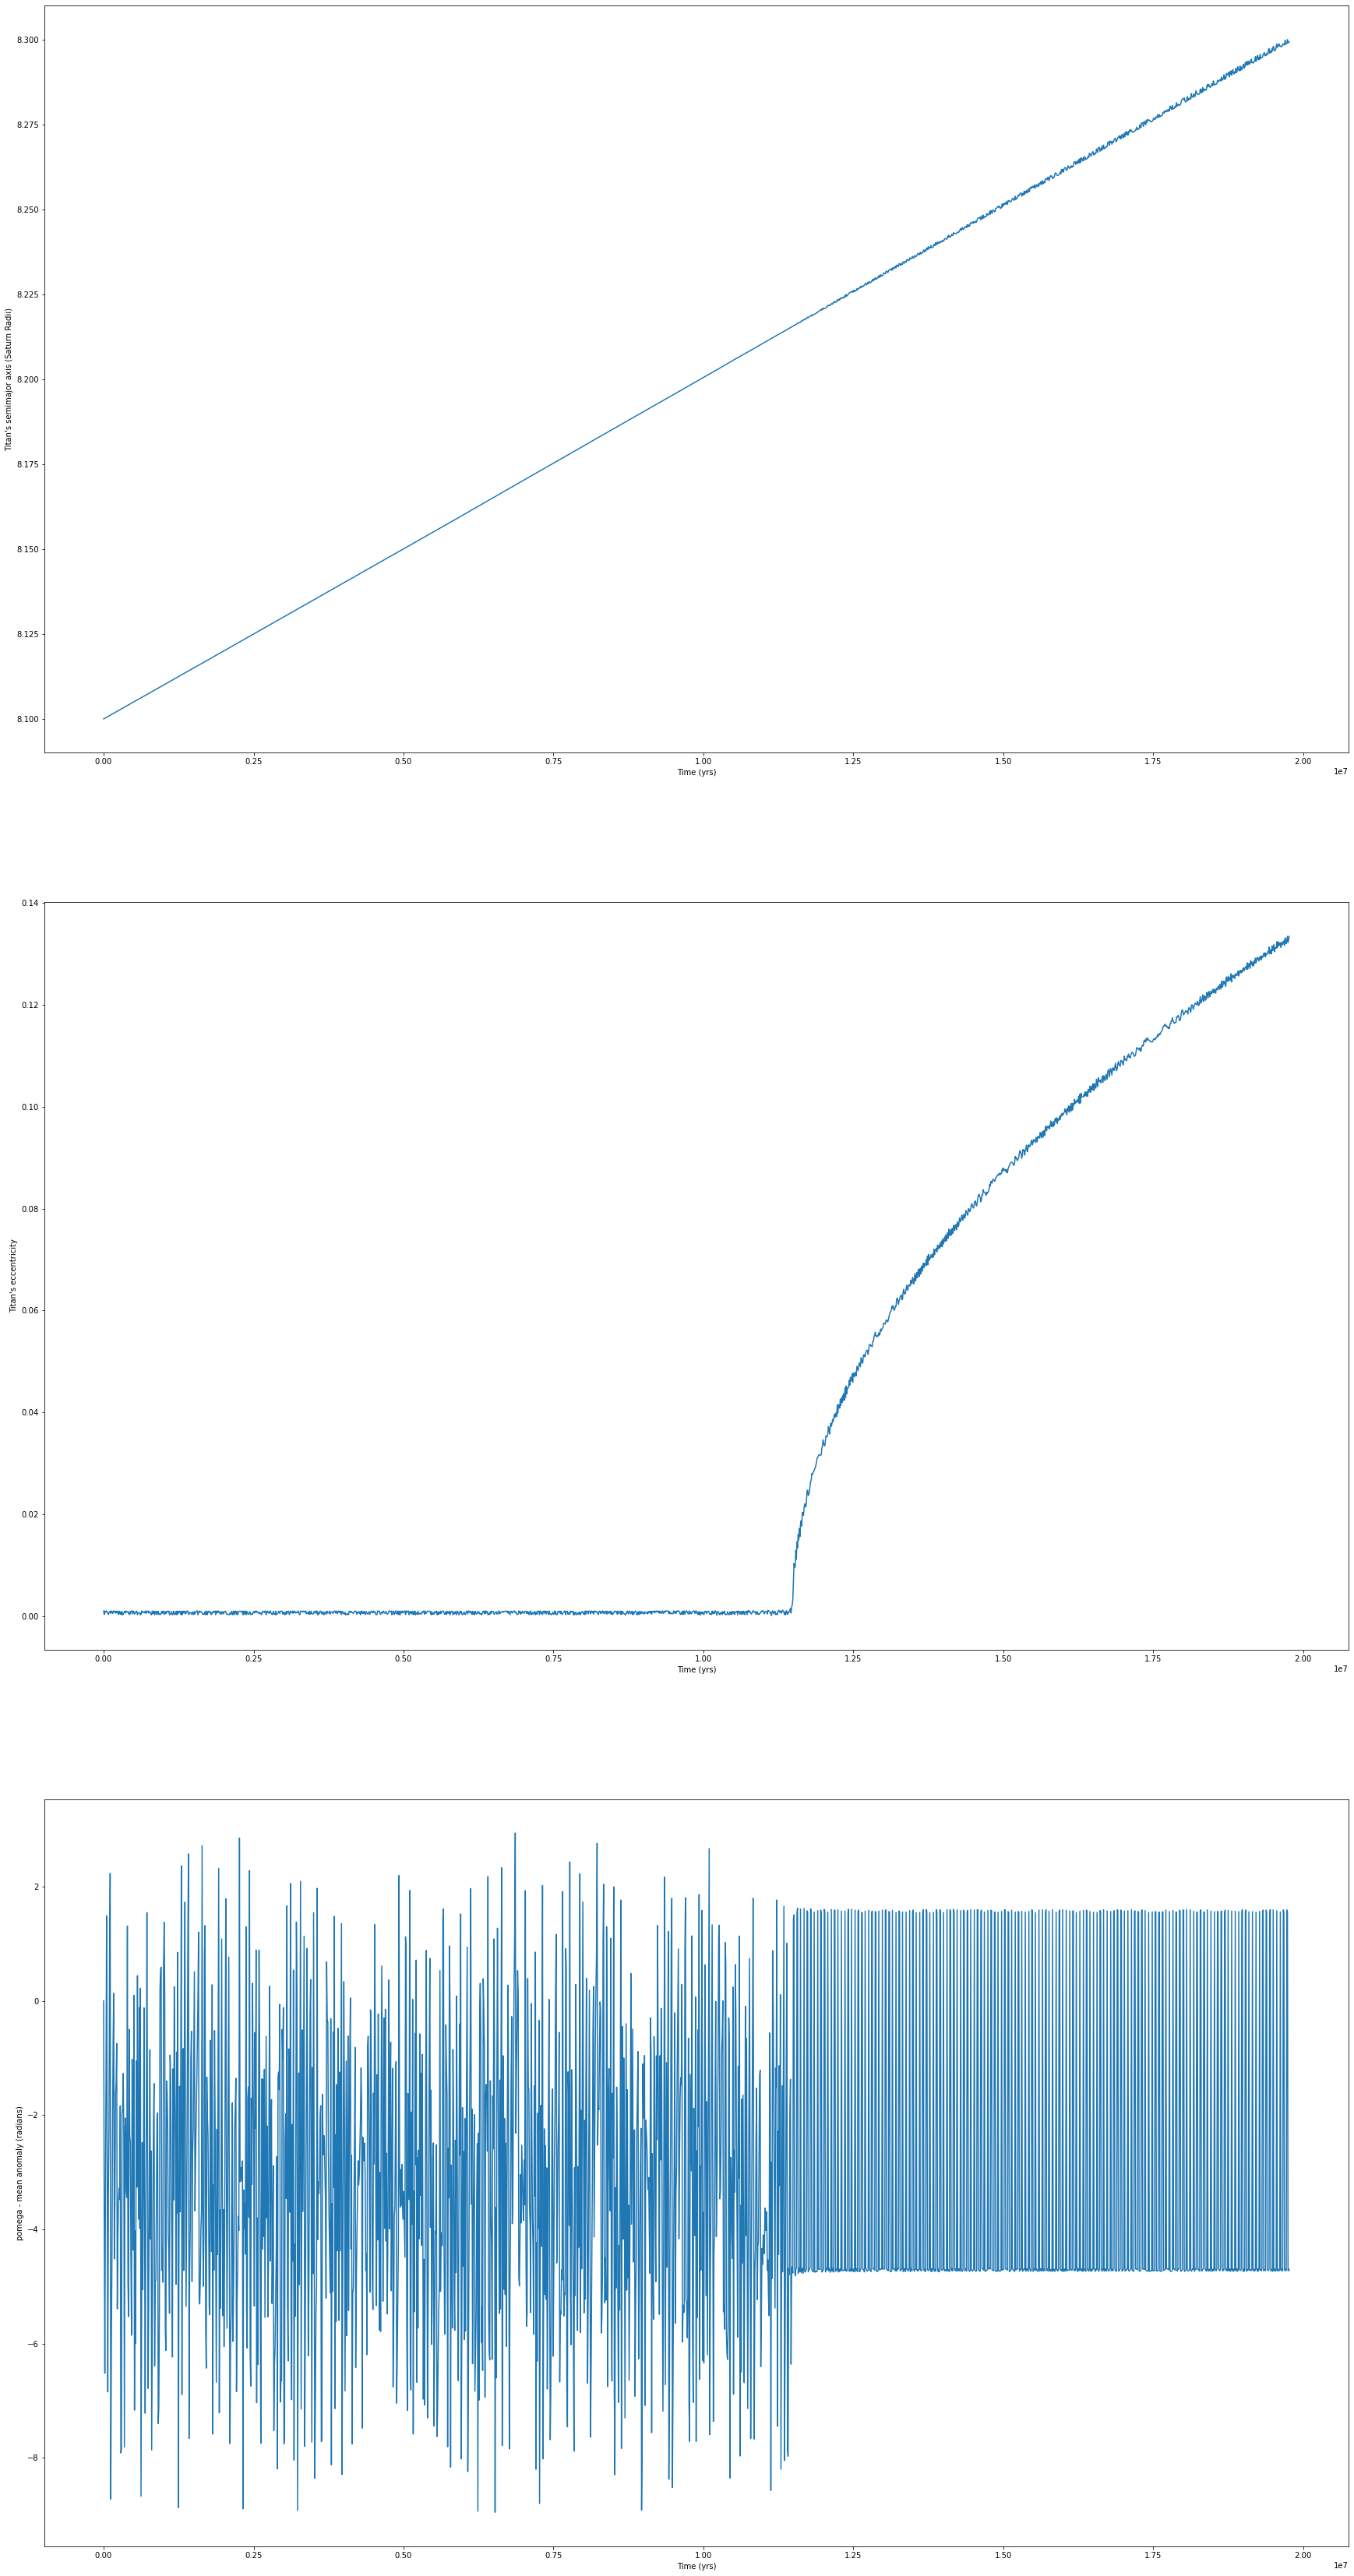

In [1]:
import matplotlib.pyplot as plt

# read arguments, and open corresponding output file
numSamples = 10000
step = 5
f = open(r"v2-output-10000s-8.1to8.3rs.txt", "r")

plotSamples = numSamples // step

# prep 3 arrays
a_array = [0] * plotSamples
e_array = [0] * plotSamples
t_array = [0] * plotSamples
diff_array = [0] * plotSamples

# read file
allLines = f.readlines()
f.close()
for i in range(3, 3 + numSamples, step):
    numbers = allLines[i].split()
    a_array[(i - 3) // step] = float(numbers[0])
    e_array[(i - 3) // step] = float(numbers[1])
    t_array[(i - 3) // step] = float(numbers[4])
    diff_array[(i - 3) // step] = float(numbers[2]) - float(numbers[3])

fig, axs = plt.subplots(3)

fig.set_size_inches(30, 60)

axs[0].plot(t_array,a_array)
axs[0].set_xlabel('Time (yrs)')
axs[0].set_ylabel('Titan\'s semimajor axis (Saturn Radii)')

axs[1].plot(t_array,e_array)
axs[1].set_xlabel('Time (yrs)')
axs[1].set_ylabel('Titan\'s eccentricity')

axs[2].plot(t_array,diff_array)
axs[2].set_xlabel('Time (yrs)')
axs[2].set_ylabel('pomega - mean anomaly (radians)')

Text(0, 0.5, 'pomega - mean anomaly (radians)')

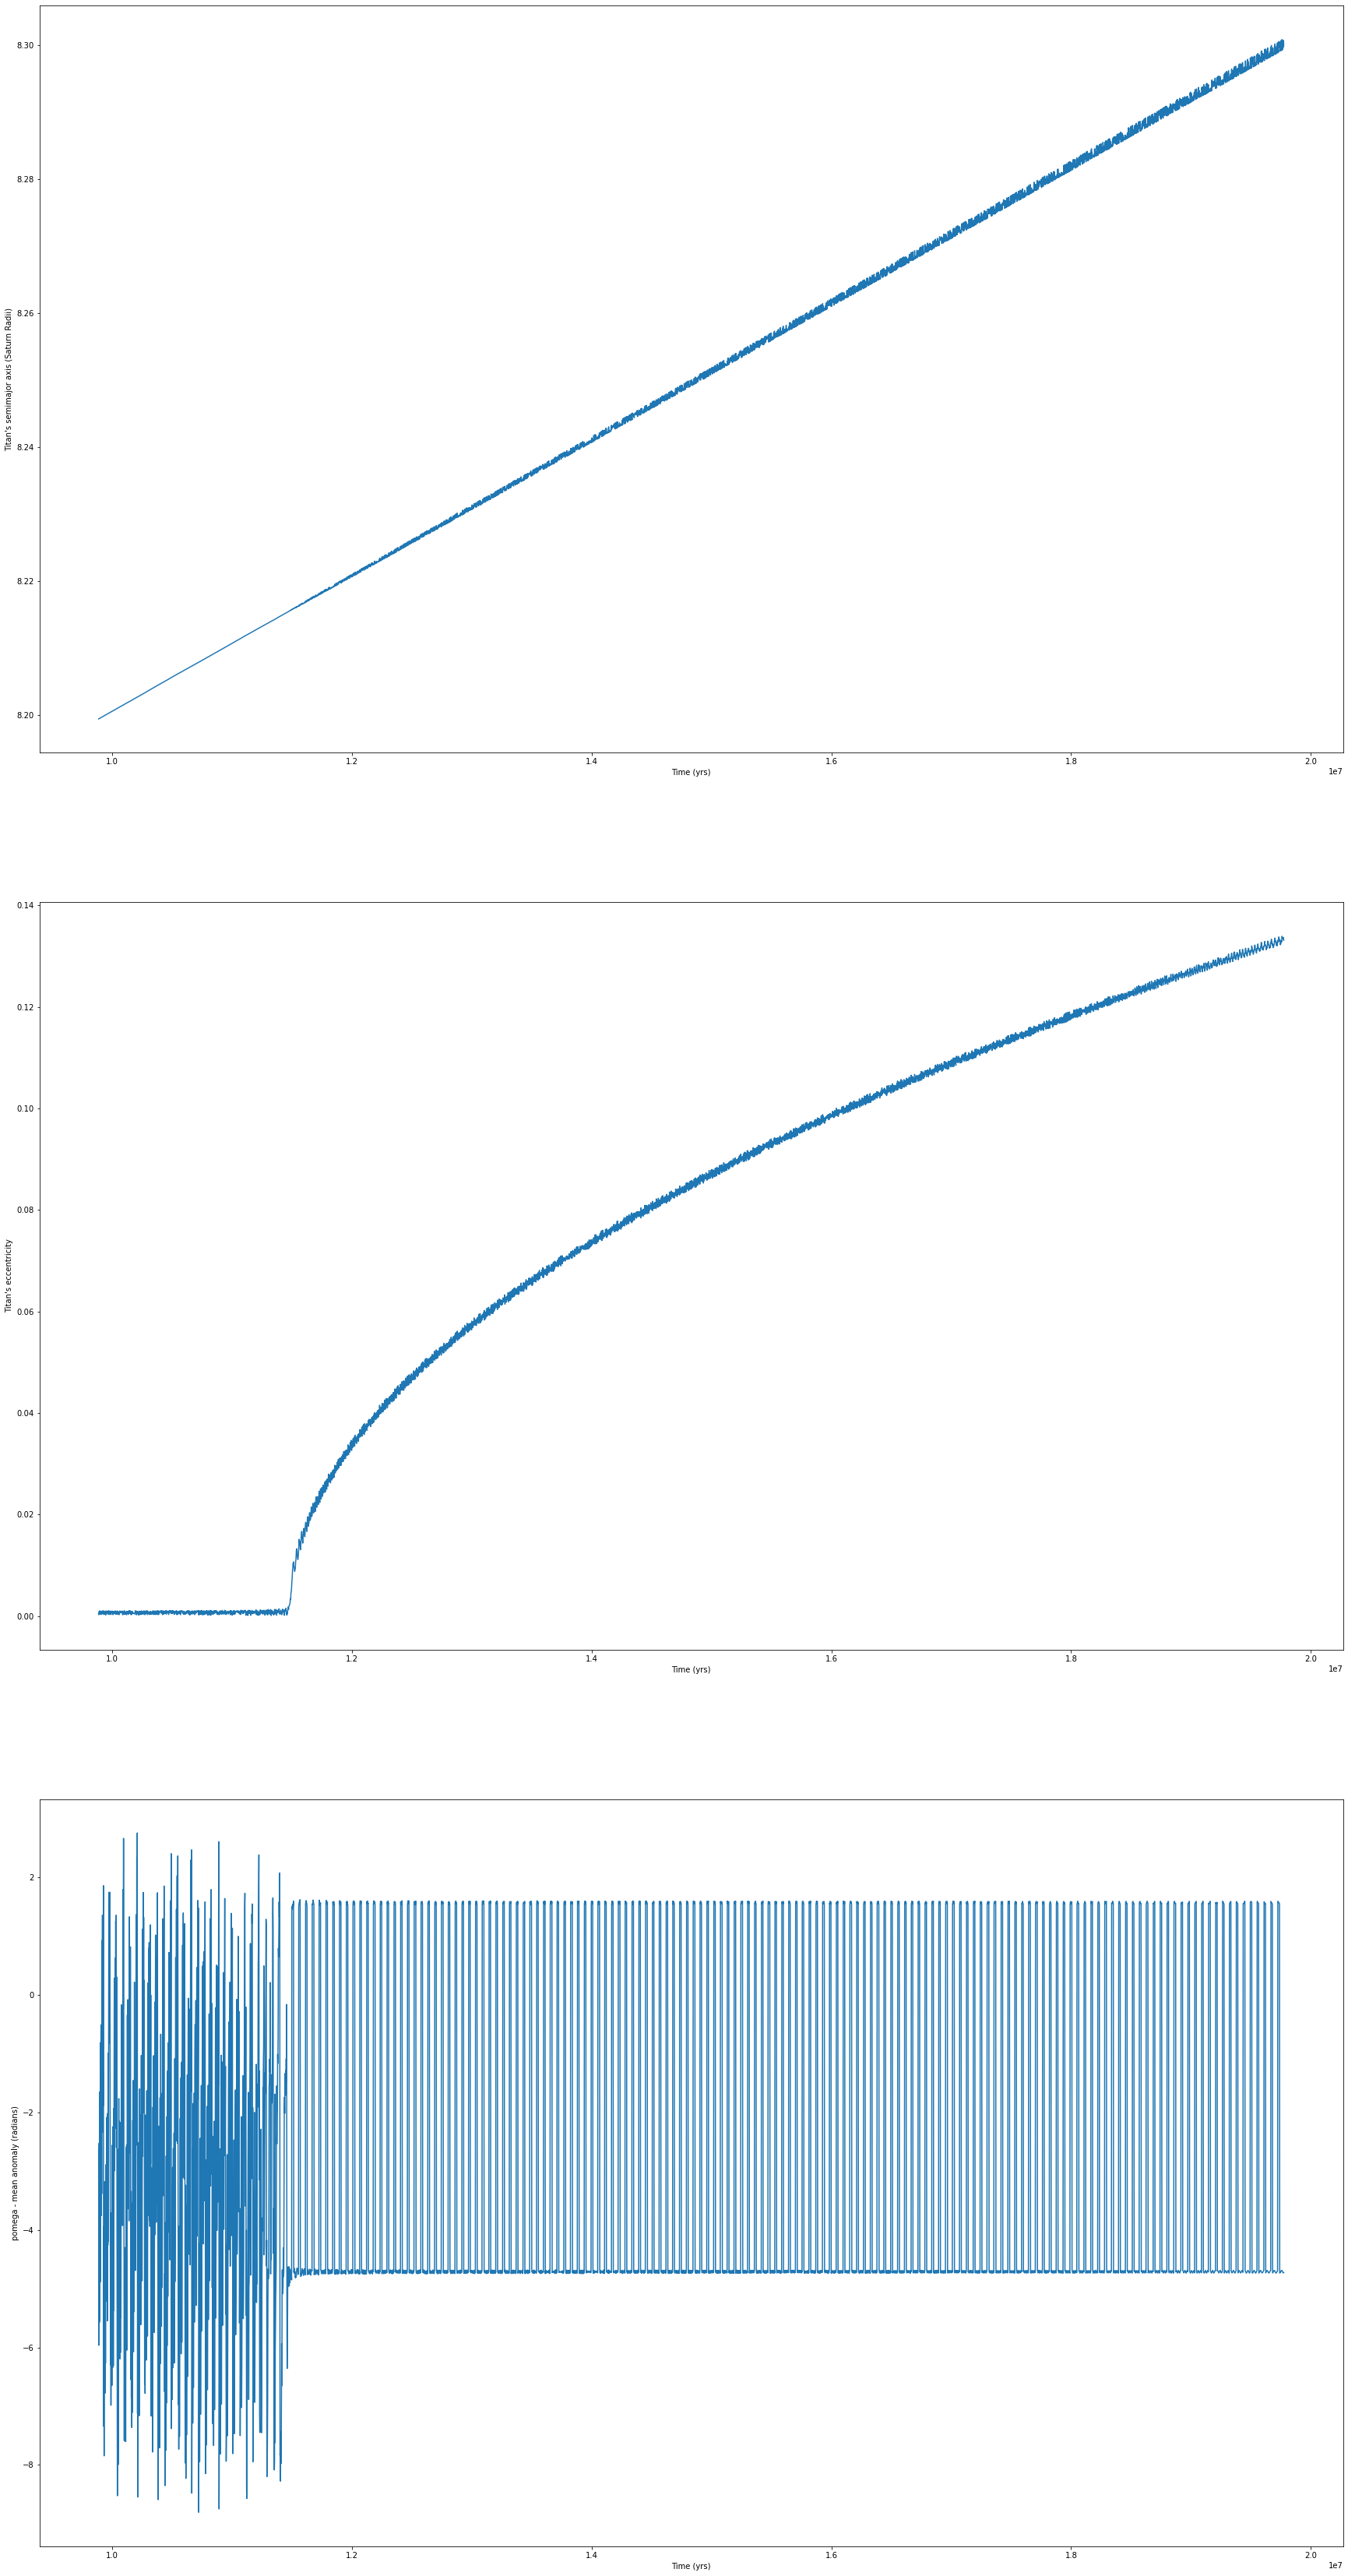

In [5]:
plotSamplesZ = int(numSamples * 0.5)

# prep 3 arrays
a_arrayZ = [0] * plotSamplesZ
e_arrayZ = [0] * plotSamplesZ
t_arrayZ = [0] * plotSamplesZ
diff_arrayZ = [0] * plotSamplesZ

for i in range(3 + numSamples - plotSamplesZ, 3 + numSamples):
    numbers = allLines[i].split()
    a_arrayZ[(i - 3 - numSamples + plotSamplesZ)] = float(numbers[0])
    e_arrayZ[(i - 3 - numSamples + plotSamplesZ)] = float(numbers[1])
    diff_arrayZ[(i - 3 - numSamples + plotSamplesZ)] = float(numbers[2]) - float(numbers[3])
    t_arrayZ[(i - 3 - numSamples + plotSamplesZ)] = float(numbers[4])

figZ, axsZ = plt.subplots(3)

figZ.set_size_inches(30, 60)

axsZ[0].plot(t_arrayZ,a_arrayZ)
axsZ[0].set_xlabel('Time (yrs)')
axsZ[0].set_ylabel('Titan\'s semimajor axis (Saturn Radii)')

axsZ[1].plot(t_arrayZ,e_arrayZ)
axsZ[1].set_xlabel('Time (yrs)')
axsZ[1].set_ylabel('Titan\'s eccentricity')

axsZ[2].plot(t_arrayZ,diff_arrayZ)
axsZ[2].set_xlabel('Time (yrs)')
axsZ[2].set_ylabel('pomega - mean anomaly (radians)')